# LAB 0: Introduction to Python for DS

### Giorgio Lazzarinetti - My Contacts
For any questions or doubts you can find my contacts here:

<p align="center">

giorgiolazzarinetti@gmail.com
g.lazzarinetti@campus.unimib.it 

</p>

### Notebook Outline

* Introduction to Python for Data Mining;
* Data Exploration and Preprocessing;
* Modeling with sklearn;
* Modeling with Pytorch



In [1]:
import pandas as pd
import pandas_profiling as pdp
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.model_selection import cross_validate

## Python for Data Mining
In this simple exercise, we check a data set reporting data for chronic kidney disease available at 

https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

Check the original files for the information about the source. We are going to  perform a preliminary exploration to check the content of the data.

The goal is to understand how to use basic python libraries such as pandas and numpy to work on data.

### Relevant Information

The data contains 400 examples described by 25 attributes (24 actual attributes and one class). 11 attributes are nominal and 14 are numerical. 250 examples belongs to class ckd, 150 examples belong to class notckd.

### Attributes
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- bgr		-	blood glucose random
- bu		-	blood urea
- sc		-	serum creatinine
- sod		-	sodium
- pot		-	potassium
- hemo		-	hemoglobin
- pcv		-	packed cell volume
- wc		-	white blood cell count
- rc		-	red blood cell count
- htn		-	hypertension
- dm		-	diabetes mellitus
- cad		-	coronary artery disease
- appet		-	appetite
- pe		-	pedal edema
- ane		-	anemia
- class		-	class	



In [77]:
#Directory that contains the file
input_data_dir = 'drive/MyDrive/Colab Notebooks/0 - Data/ChronicKidneyDisease.csv'

### Pandas
**Pandas** is a Python library used for working with data sets.

It has functions for analyzing, cleaning, exploring, and manipulating data.

The core element of Pandas is the **DataFrame**. A Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.

The easiest way to load file into a Pandas DataFrame is to read it from a csv file by using the built-in function 'read_csv'. It get the directory of the file, the separator (e.g: ',') and eventually the names of the columns. 

In [78]:
# read the csv file
df = pd.read_csv(input_data_dir, sep=',')

Once we have the DataFrame we can firstly visualize the head rows of our dataset (with the buil-in fucntion 'head') and then plot some basic statistic (with the built-in function 'describe')

In [80]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [81]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


Given a pandas DataFrame we have some common function that can be used to check datatypes, slice it, or select specific columns

In [82]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [83]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [86]:
df.iloc[0, 6]

'normal'

All the aggregation extracted from the 'describe' function can be computed separately per each column by using the built-in function for count, mean etc.

In [88]:
df['age'].mean() #mean, max, min ...

51.48337595907928

We can also see the distinct values of each column possibly counting them with a group by function

In [89]:
df['pc'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [90]:
df['pc'].nunique()

2

In [91]:
grouped = df.groupby(['class']).count()
grouped

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
class,,,,,,,,,,,,,,,,,,,,,
ckd,242,240,208,209,206,107,194,250,250,212,...,204,183,151,126,250,250,250,250,250,250
notckd,149,148,145,145,145,141,141,146,146,144,...,144,146,143,143,148,148,148,149,149,149


In [94]:
grouped.reset_index

<bound method DataFrame.reset_index of         age   bp   sg   al   su  rbc   pc  pcc   ba  bgr  ...  hemo  pcv  \
class                                                     ...              
ckd     242  240  208  209  206  107  194  250  250  212  ...   204  183   
notckd  149  148  145  145  145  141  141  146  146  144  ...   144  146   

        wbcc  rbcc  htn   dm  cad  appet   pe  ane  
class                                               
ckd      151   126  250  250  250    250  250  250  
notckd   143   143  148  148  148    149  149  149  

[2 rows x 24 columns]>

We can modify the values of each column according to a specific function. This is very useful when performing feature engineering, for example in case you want to convert a numeric variable to a categorical one. Let's do it for the "age" feature.

In [96]:
def bin_age(x):
  if x<30:
    return 'young'
  if x>30 and x<60:
    return 'adult'
  if x>60:
    return 'old'
  else:
    return 'unknown'

df['age'].apply(lambda x: bin_age(x))

0      adult
1      young
2        old
3      adult
4      adult
       ...  
395    adult
396    adult
397    young
398    young
399    adult
Name: age, Length: 400, dtype: object

Note that the apply function does not work inplace.

In [97]:
df['age']

0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64

In [98]:
#build a new variable to assign the new categorical value of the age
df['cat_age'] = df['age'].apply(lambda x: bin_age(x))

In [99]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class', 'cat_age'],
      dtype='object')

In [100]:
df.drop(['cat_age'], axis=1, inplace=True)
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

Let's now extract a list of all the categorical and numerical varaibles

In [101]:
df.dtypes==object

age      False
bp       False
sg       False
al       False
su       False
rbc       True
pc        True
pcc       True
ba        True
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn       True
dm        True
cad       True
appet     True
pe        True
ane       True
class     True
dtype: bool

In [20]:
#first we get a boolean list that for each variable return True or False according to the fact that the variable is categorical or not
categorical_variables_mask = df.dtypes==object
categorical_variables = df.columns[categorical_variables_mask].tolist()
numerical_variables = df.columns[~categorical_variables_mask]
numerical_variables_with_class = numerical_variables.tolist()

print('== categorical variables==')
print(categorical_variables)
print('\n==numerical variables==')
print(numerical_variables_with_class)

== categorical variables==
['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

==numerical variables==
['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


## Data Exploration and Preprocessing

In order to visualize the data with some common plots we can use the library 'pandas_profiling' that allow us to create a Profile Report in an interactive HTML file (that can be saved or visualized directly in the notebook environment)

In [21]:
prof = pdp.ProfileReport(df)
prof

Output hidden; open in https://colab.research.google.com to view.

### Imputation 
By looking at the plots we can see that we have both categorical and numerical variables and that there are some variables with missing values. 

Let's start by imputing the missing values using an Imputer from **scikit-learn**.

scikit-learn is a frameowrk for builidng standard machine learning models in an easy way. It comes with many classes and function to compute metrics and score, to perform dimensionality reduction and model training, validation and selection.

In [105]:
#first we impute the numerical variable with the median

from sklearn.impute import SimpleImputer as Imputer


numerical_imputer = Imputer(missing_values=np.nan, strategy="median", copy=True)
numerical_imputer.fit(df[numerical_variables])
df_numerical_imputed_array = numerical_imputer.transform(df[numerical_variables])

#the pd.DataFrame method allow us to build a dataframe starting from an array or another pandas DataFrame
df_numerical_imputed = pd.DataFrame(data=df_numerical_imputed_array, columns=numerical_variables)


#Next we imputate the categorical variable with a contributed imputer 
#that has the same interface but works on single variables/columns


categorical_data = {}
categorical_imputer = Imputer(missing_values=np.nan, strategy='most_frequent', copy=True)

categorical_imputer.fit(df[categorical_variables])
categorical_data = categorical_imputer.transform(df[categorical_variables])

df_categorical_imputed = pd.DataFrame(categorical_data,columns=categorical_variables)

# merge the two data frames
df_imputed = pd.concat([df_numerical_imputed, df_categorical_imputed],axis=1)

In [106]:
df_imputed.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


### Data Exploration
Let's now explore the dataset with **seaborn** and **matplotlib**. The former is a library for building visualizations and graph, the second is a library to customize the plot. 

First we wisualize the correlation matrix (with respect to the pearson coefficient). We use the *heatmap* function over the correlation matrix.

<AxesSubplot:>

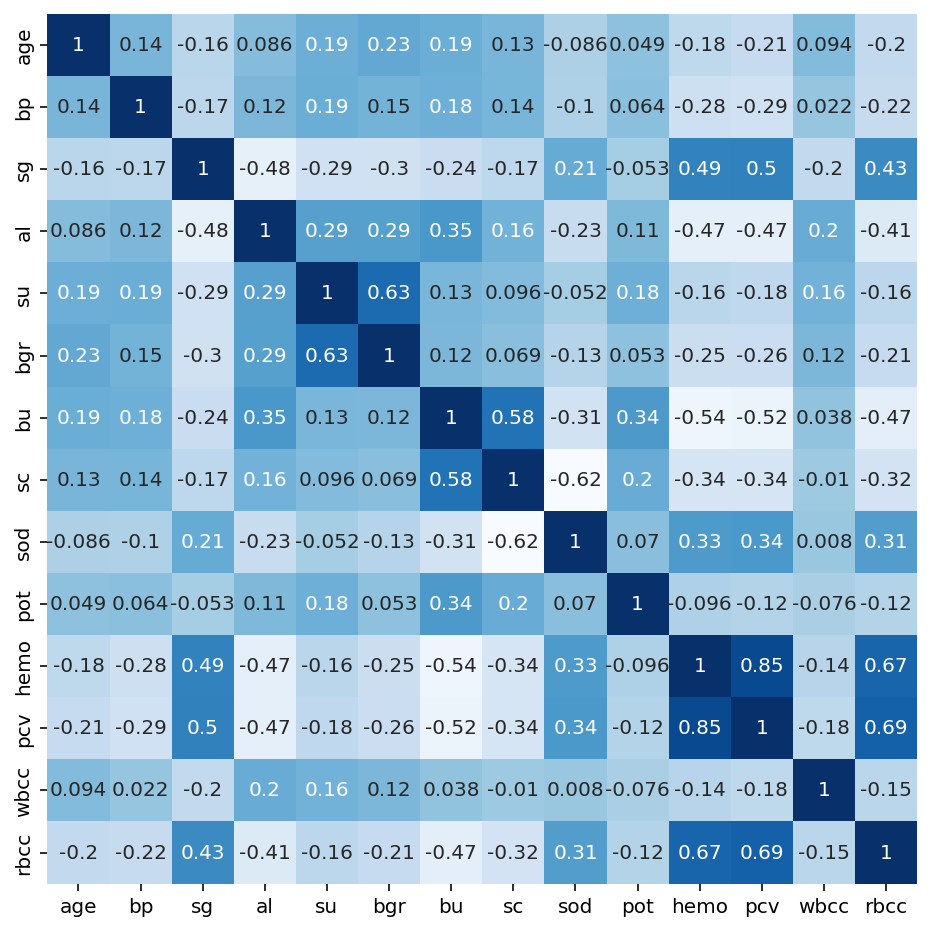

In [108]:
#we compute the correlation matrix by using the pandas DataFrame built-in "corr" function
cov = df_imputed[numerical_variables].corr(method='pearson')
plt.figure(figsize = (8,8))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [107]:
cov

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.230731,0.194291,0.133985,-0.086040,0.049399,-0.178308,-0.212796,0.093794,-0.203199
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303,-0.289237,0.022177,-0.219317
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699,0.496434,-0.195068,0.432222
al,0.085918,0.123518,-0.479962,1.000000,0.287751,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399,-0.473446,0.202920,-0.405092
su,0.186750,0.189561,-0.292053,0.287751,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807,-0.181285,0.156649,-0.161994
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435,-0.258200,0.119881,-0.214094
bu,0.194291,0.180841,-0.244995,0.347418,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635,-0.523091,0.038362,-0.465243
sc,0.133985,0.143184,-0.171998,0.161310,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492,-0.338611,-0.010333,-0.321737
sod,-0.086040,-0.100705,0.210791,-0.225612,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483,0.343555,0.008010,0.313929
pot,0.049399,0.063667,-0.052935,0.107893,0.177396,0.052732,0.339771,0.204751,0.069612,1.000000,-0.096428,-0.117795,-0.075563,-0.118226


we can further analyze the relations among variables by using clustermaps on the correlation matrix.

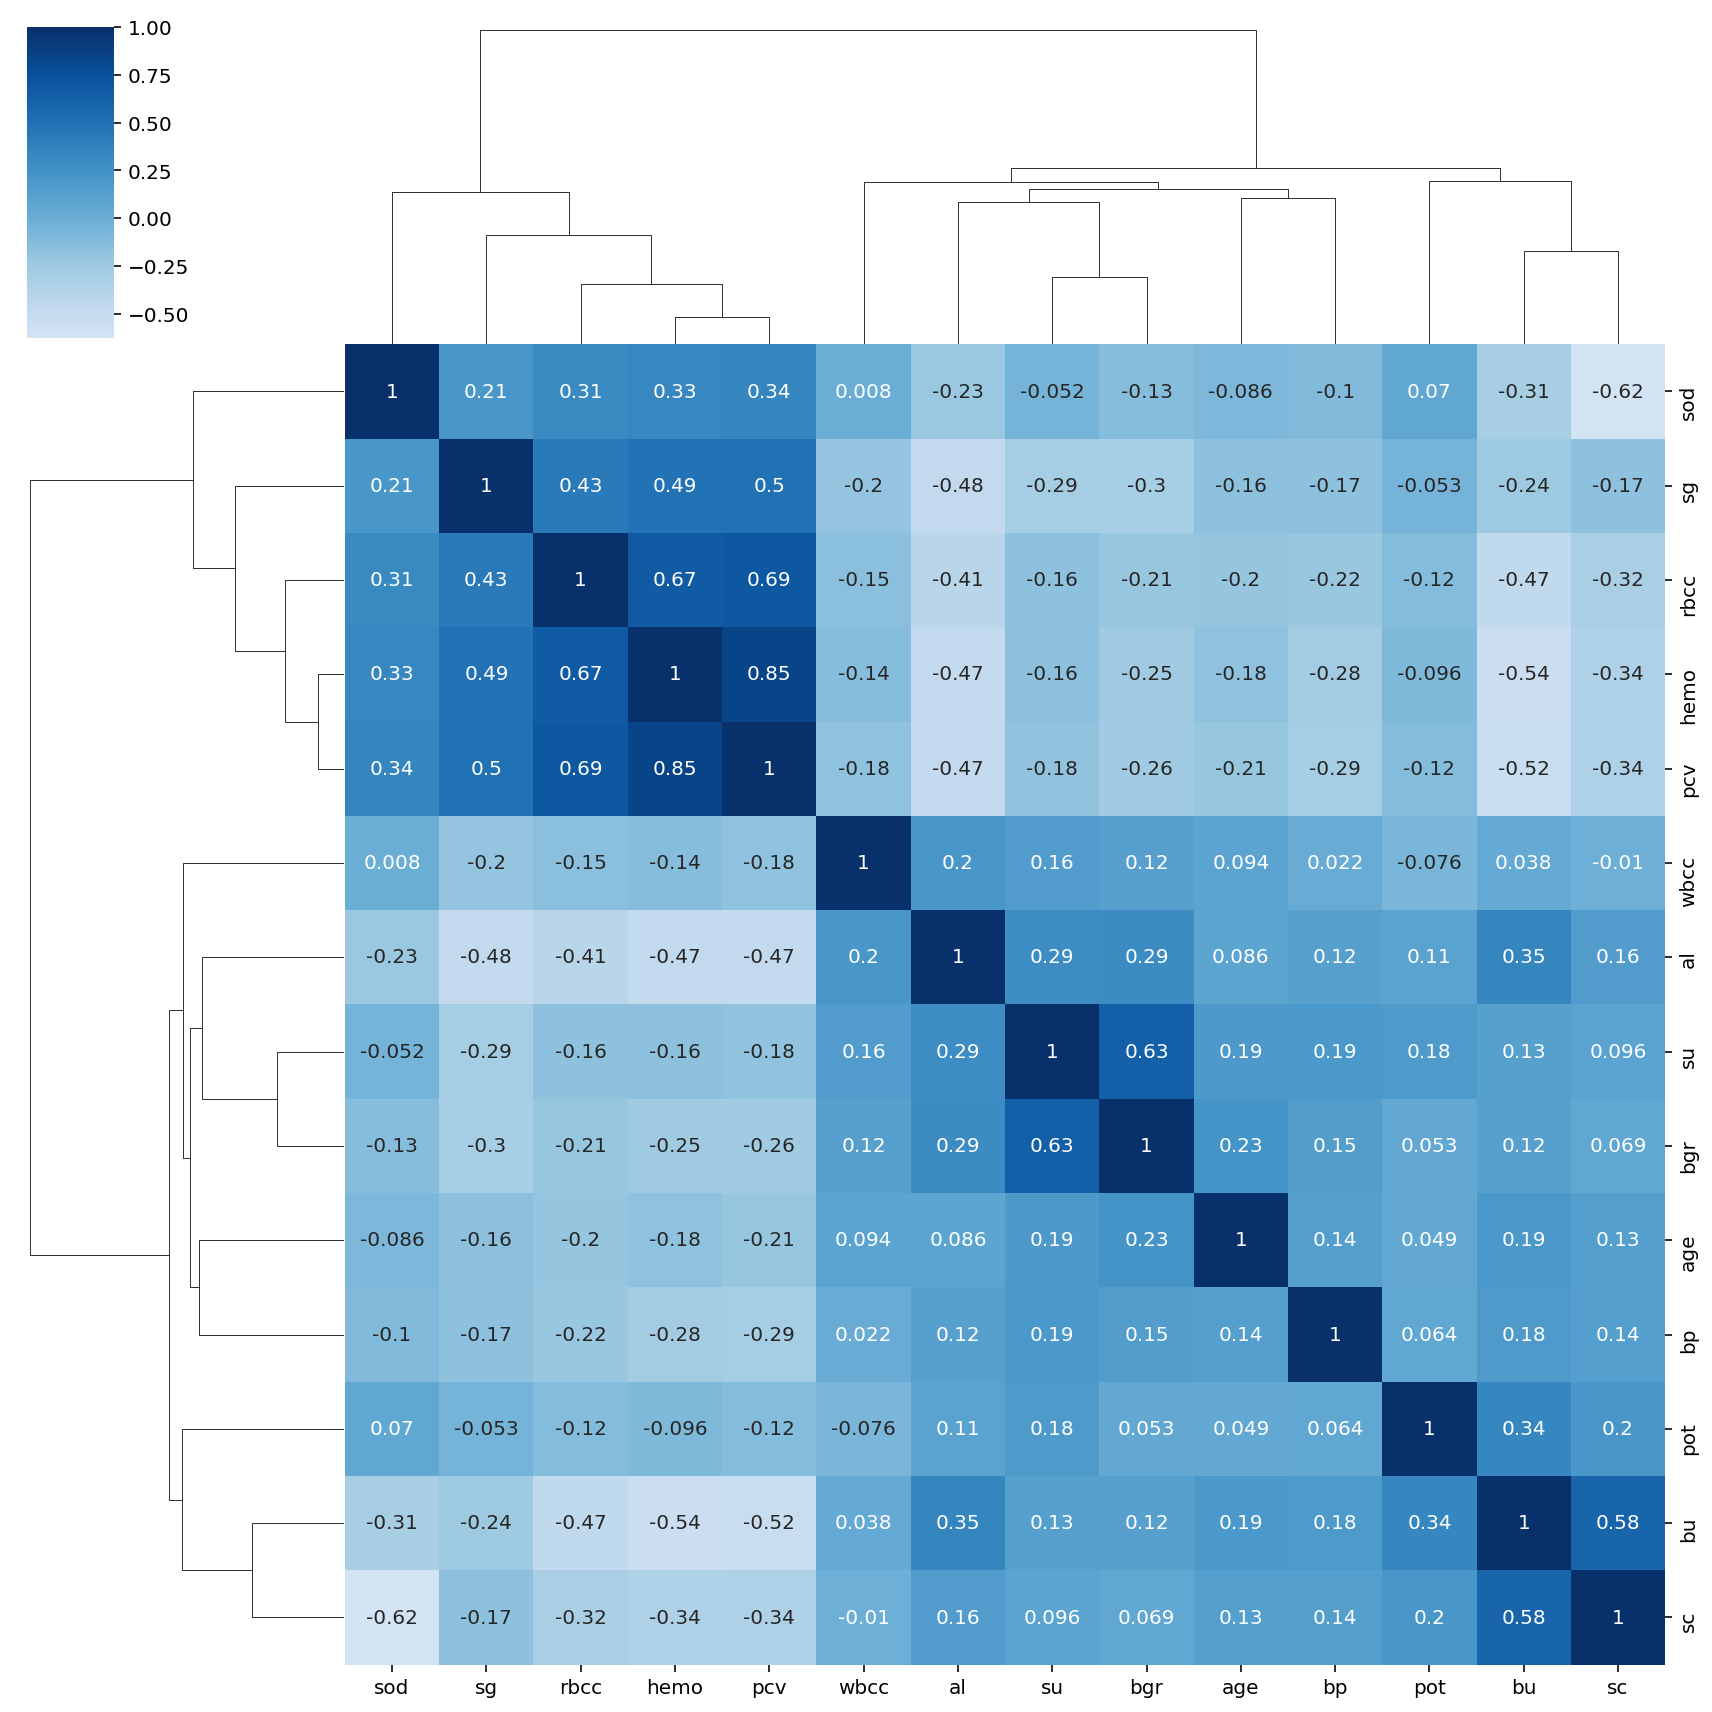

In [109]:
sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(12, 12))
#cm.cax.set_visible(False)

Now we check how features vary with each data input. Since the variables have different scale we'll standardize the data (using sklearn) for a better visualization.

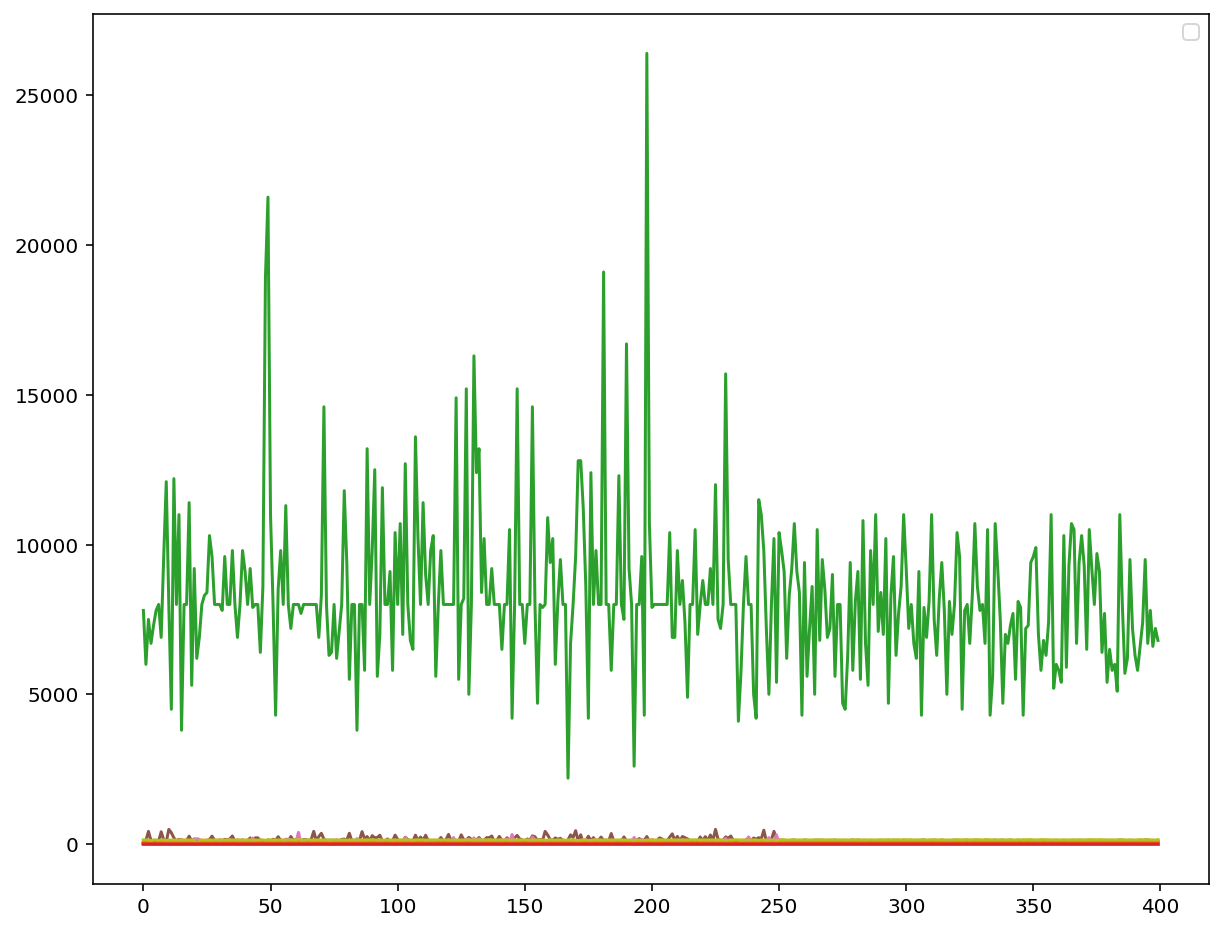

In [110]:
plt.figure(figsize=(10,8))
for v in numerical_variables:
    plt.plot(df_imputed[v])
plt.legend(loc='best')

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_imputed[numerical_variables])
df_normalized_values = scaler.transform(df_imputed[numerical_variables])
df_normalized = pd.DataFrame(data = df_normalized_values, columns=numerical_variables)

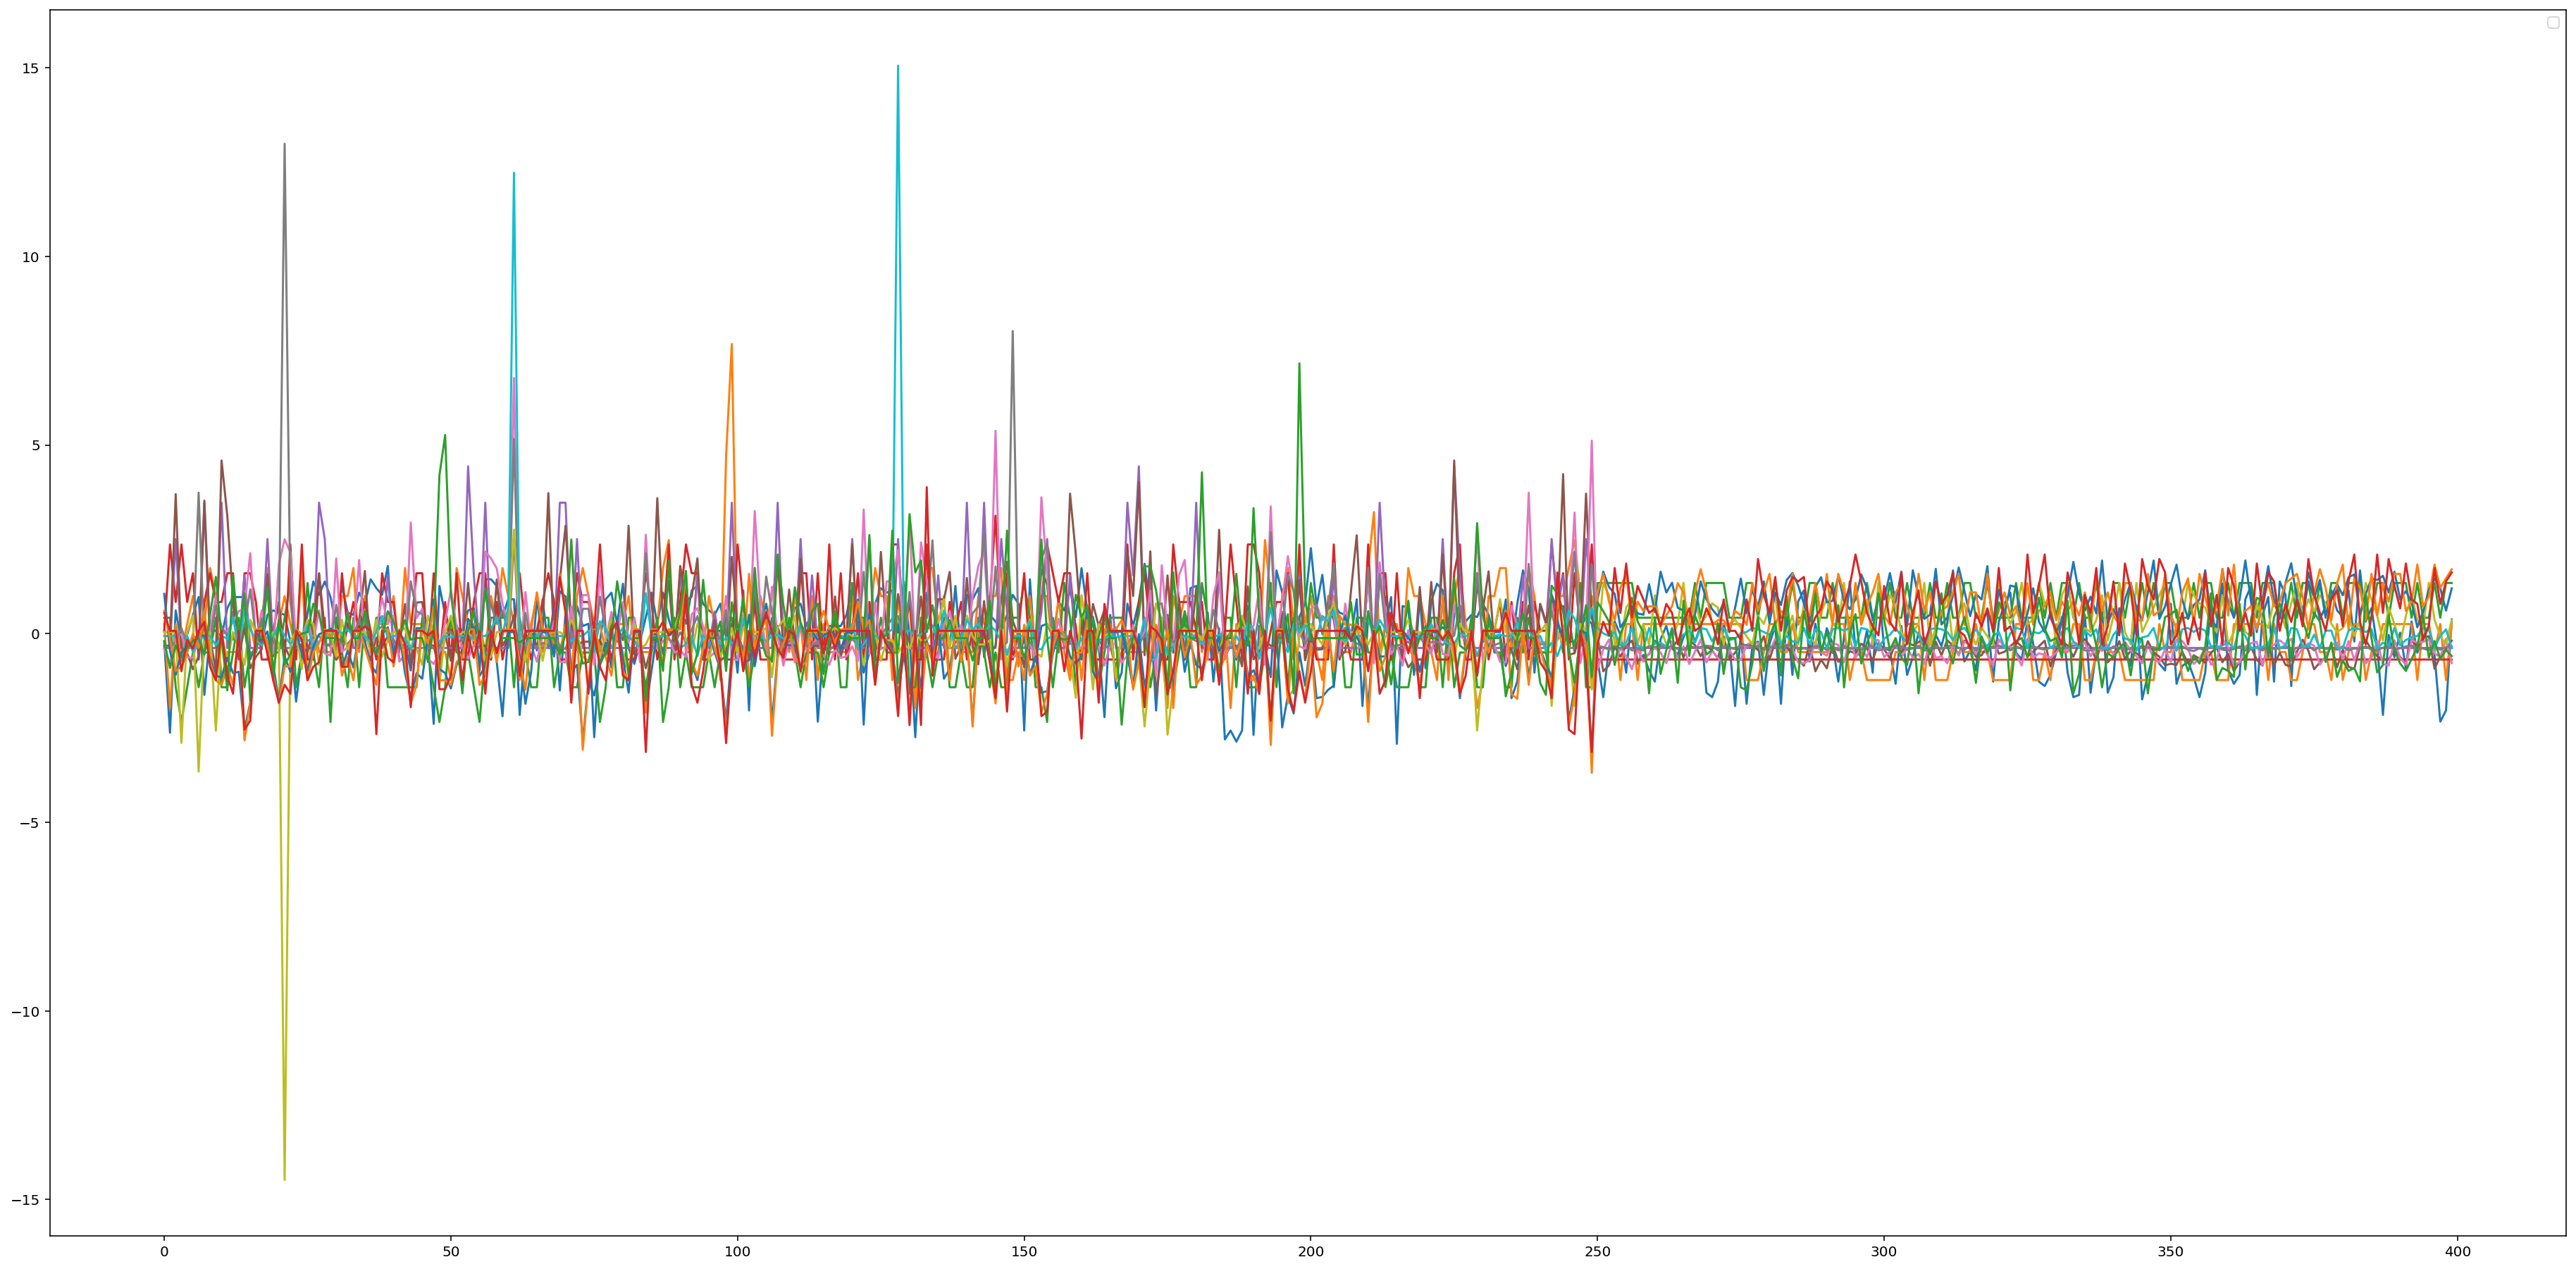

In [115]:
plt.figure(figsize=(32,16))
for v in numerical_variables:
    plt.plot(df_normalized[v])
plt.legend(loc='best')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x4032 with 0 Axes>

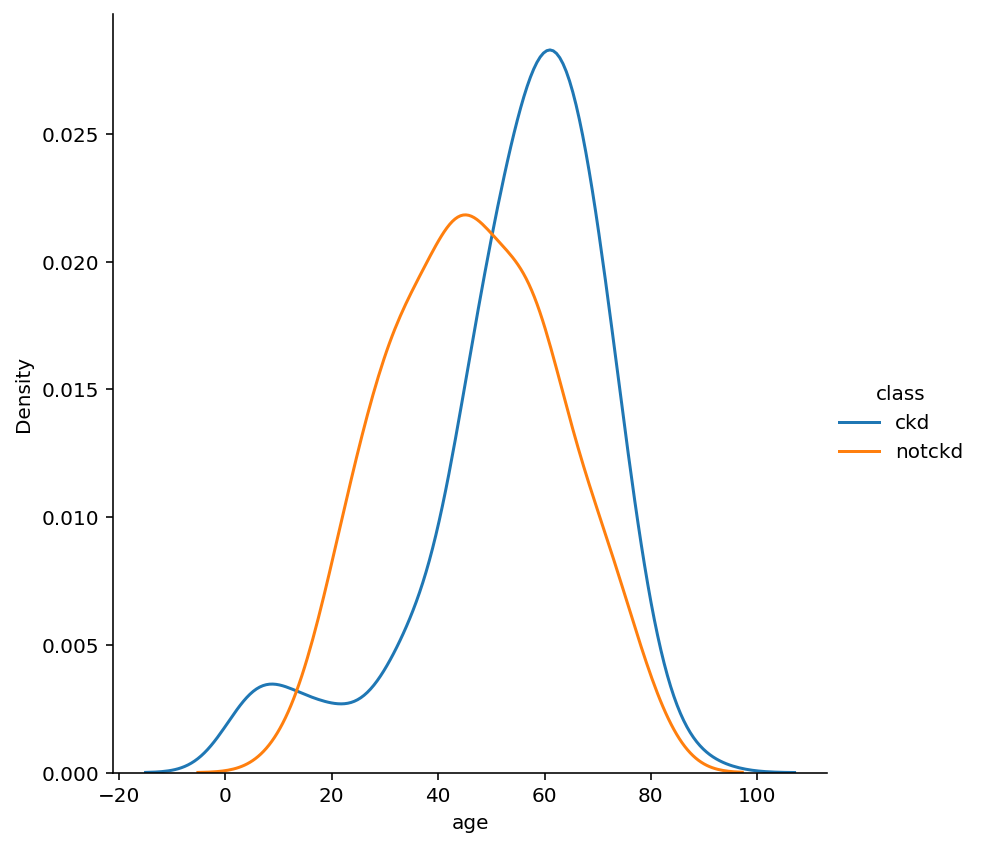

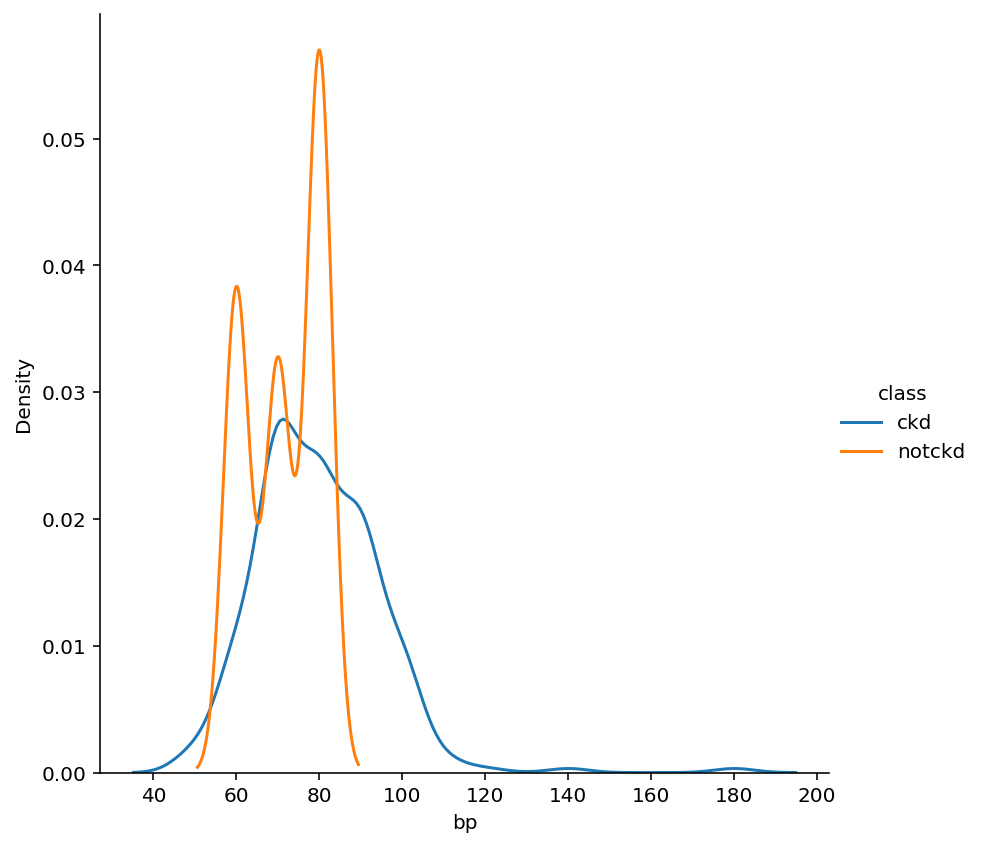

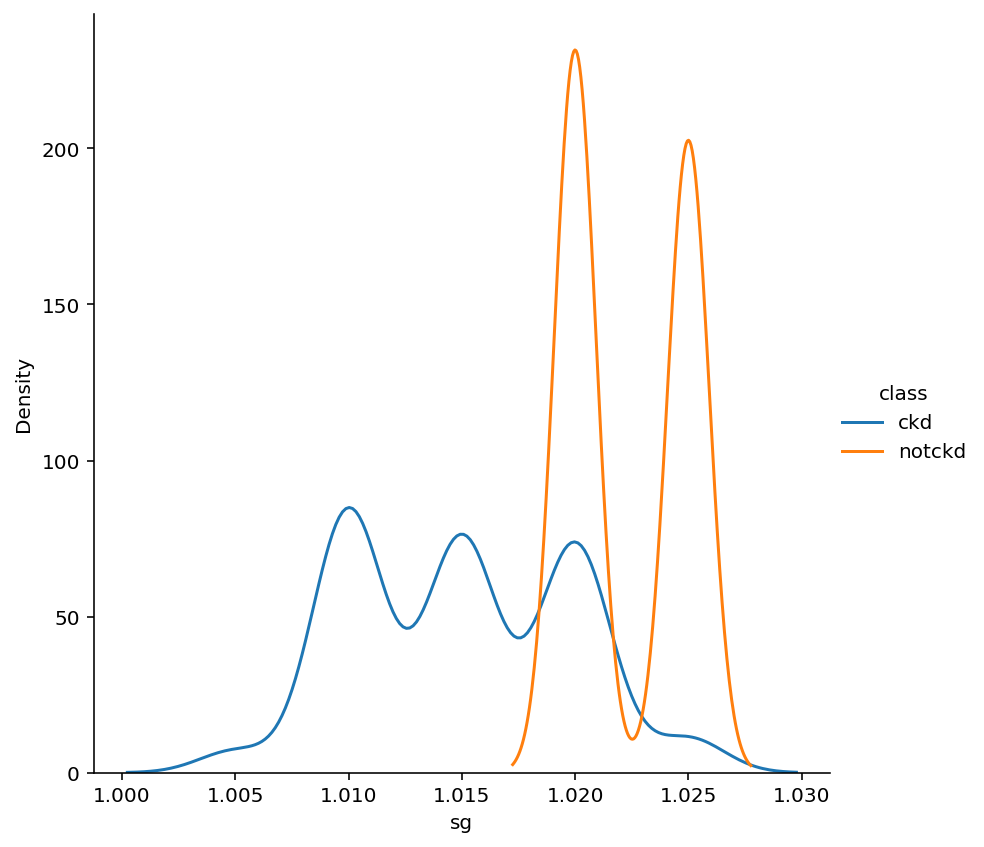

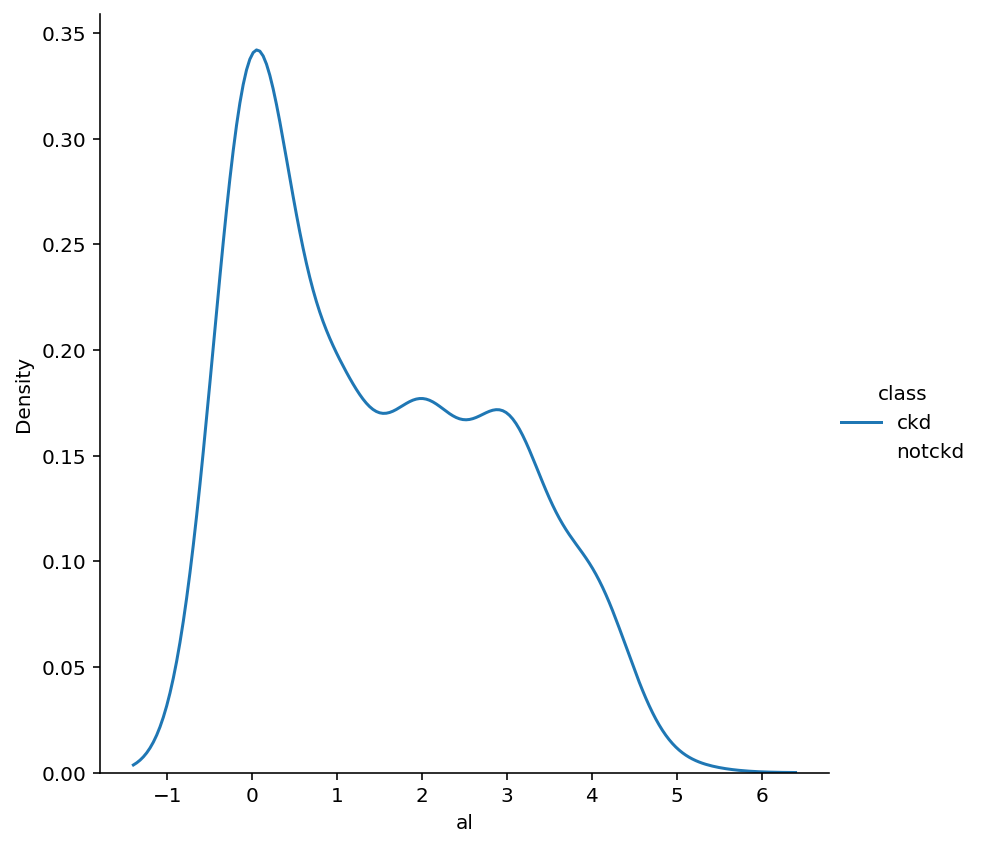

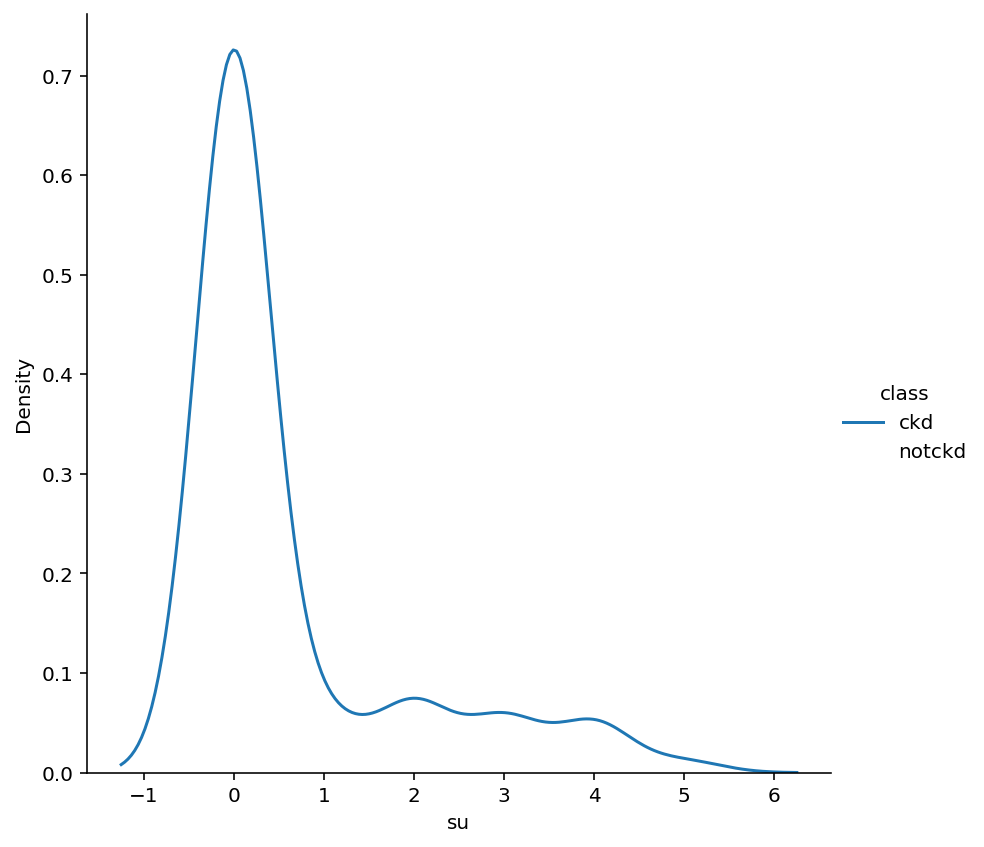

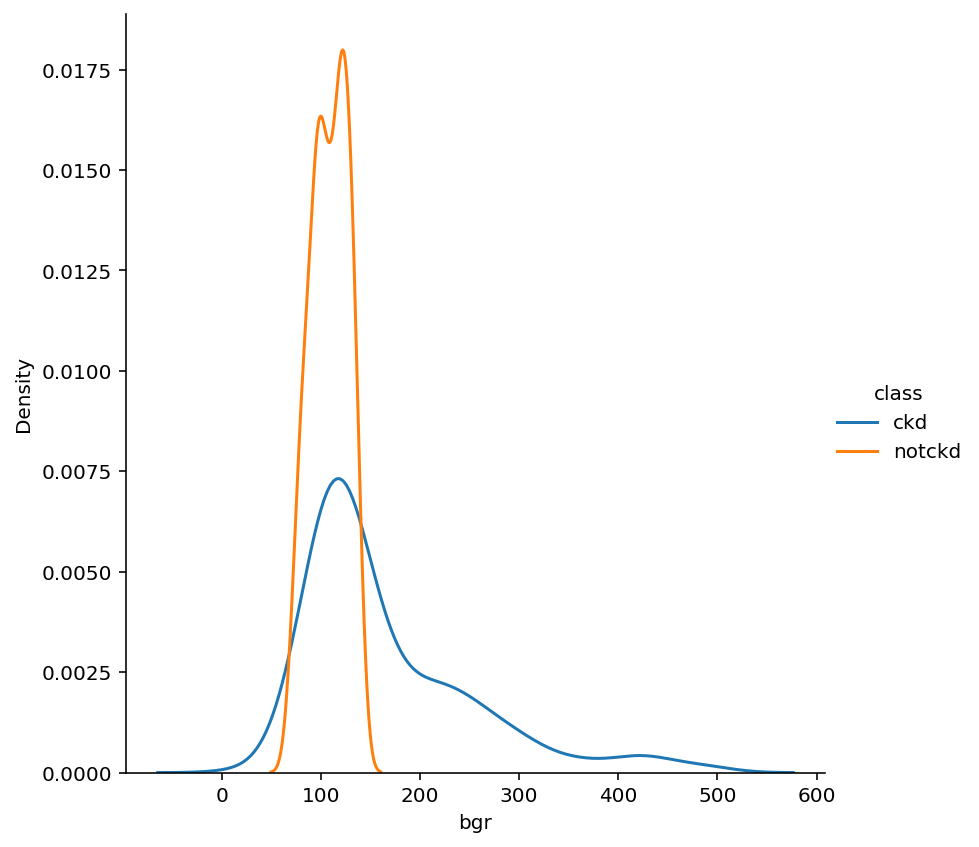

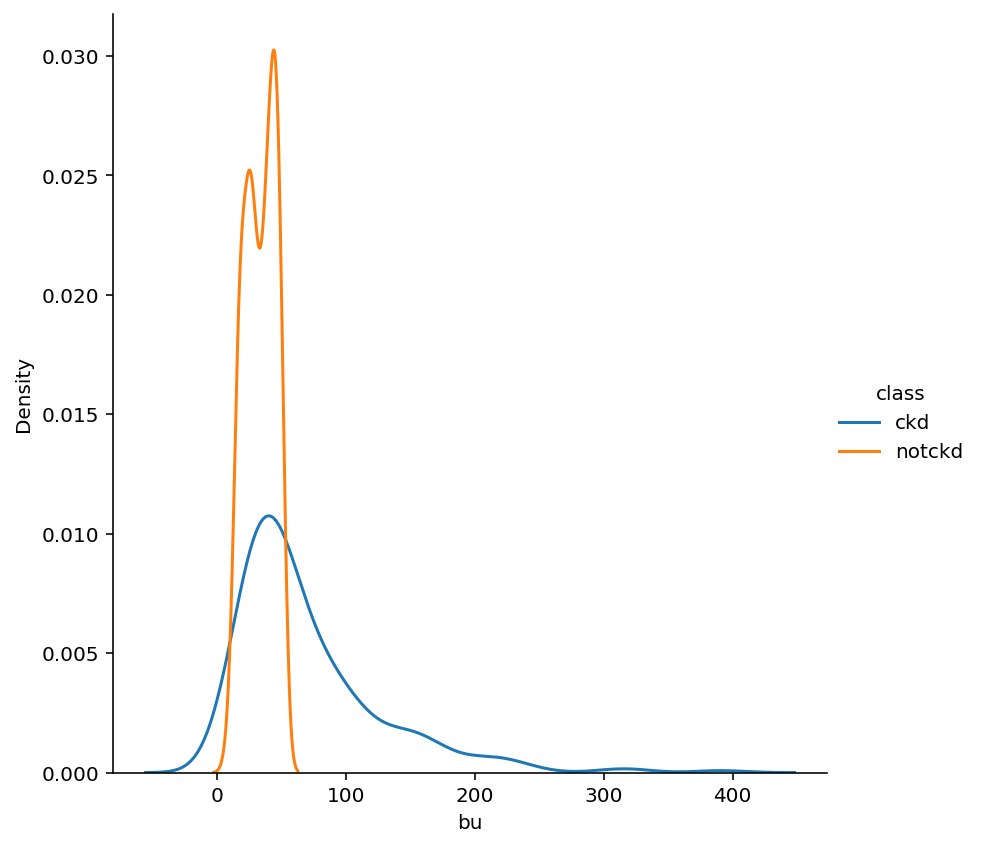

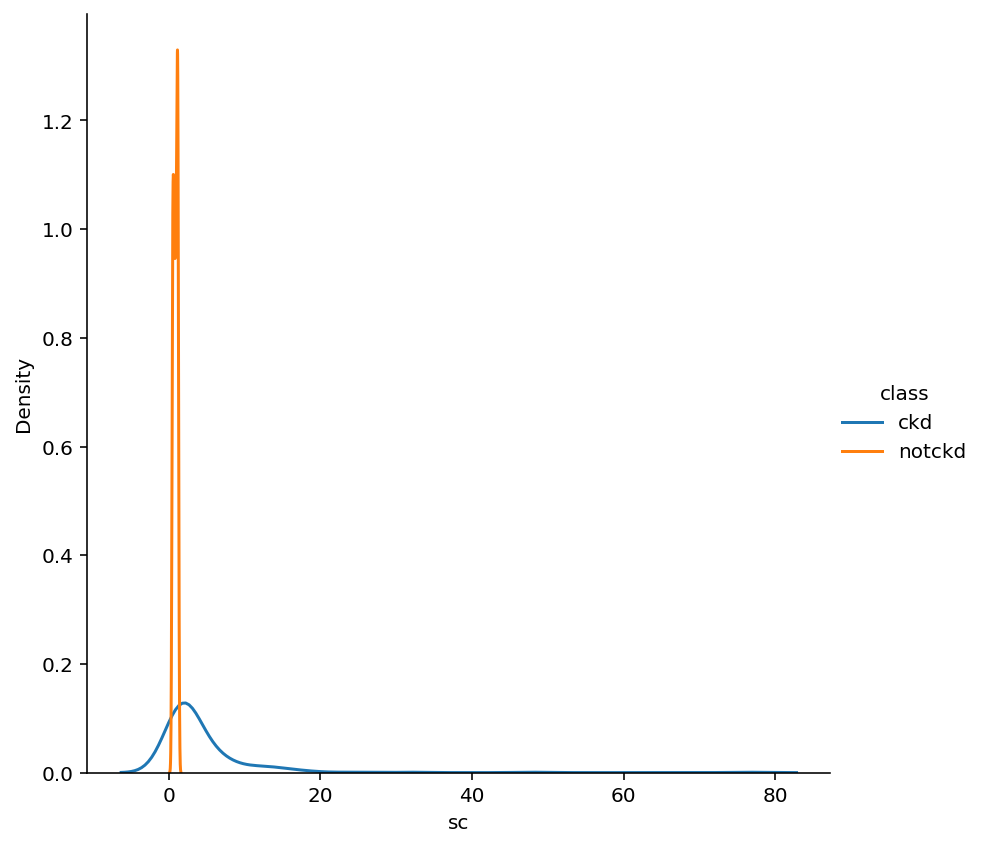

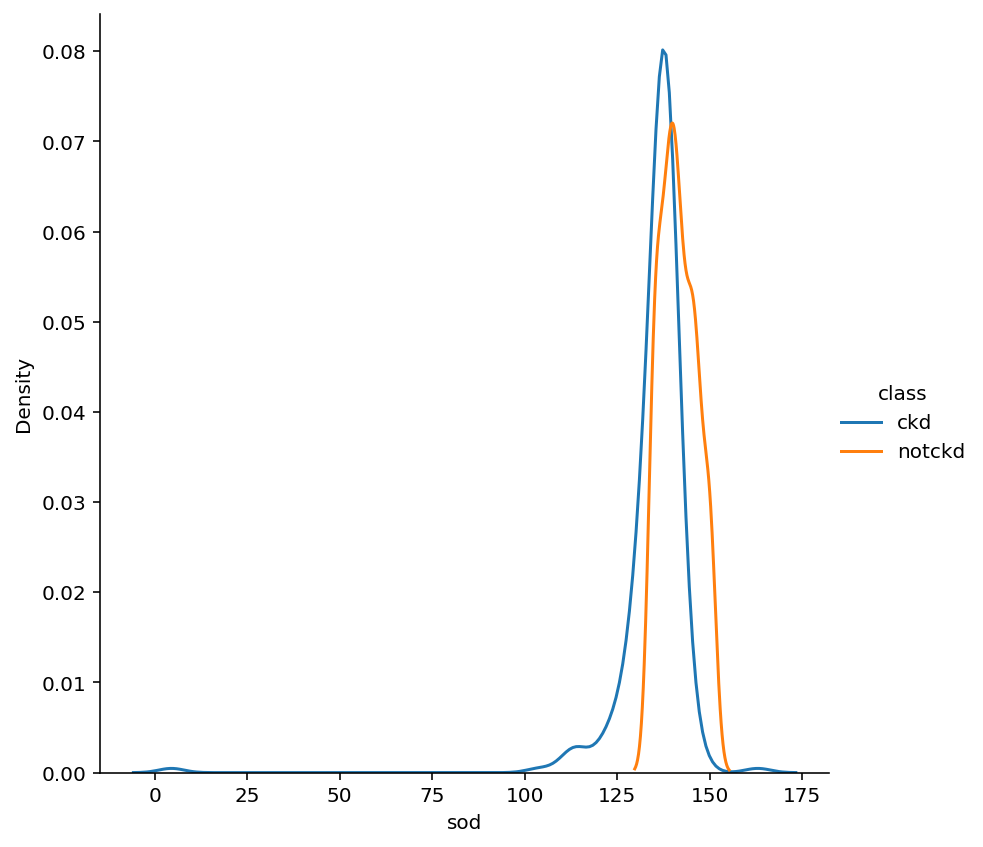

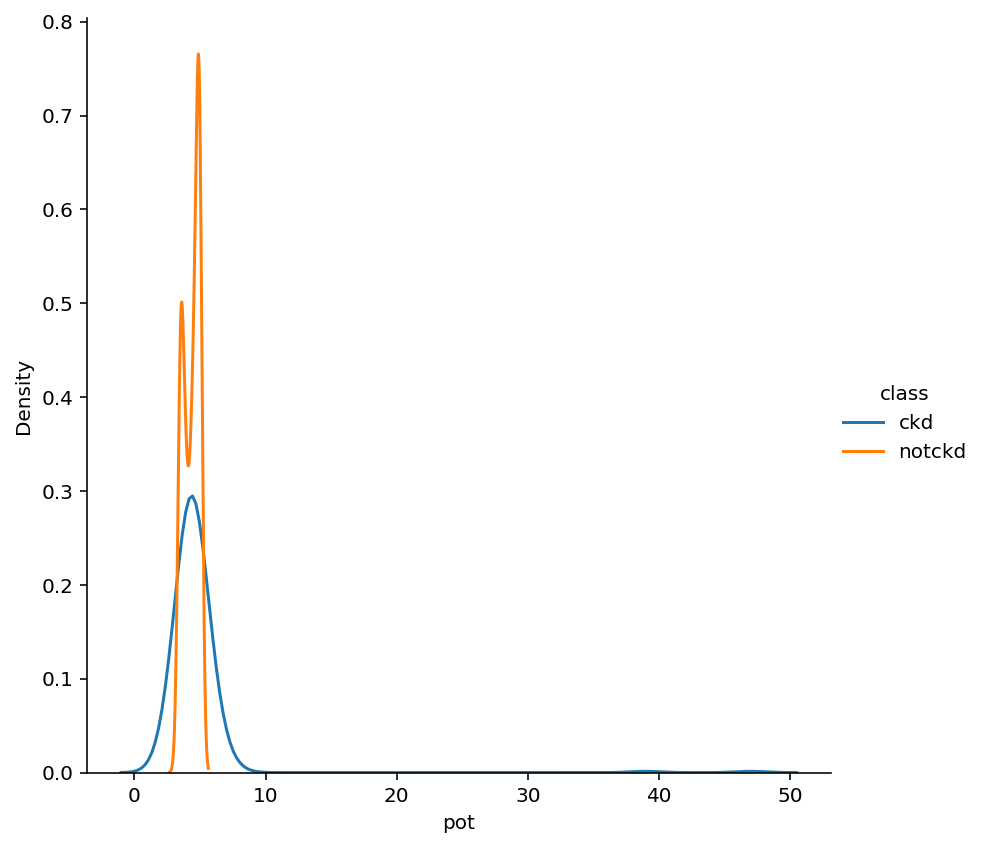

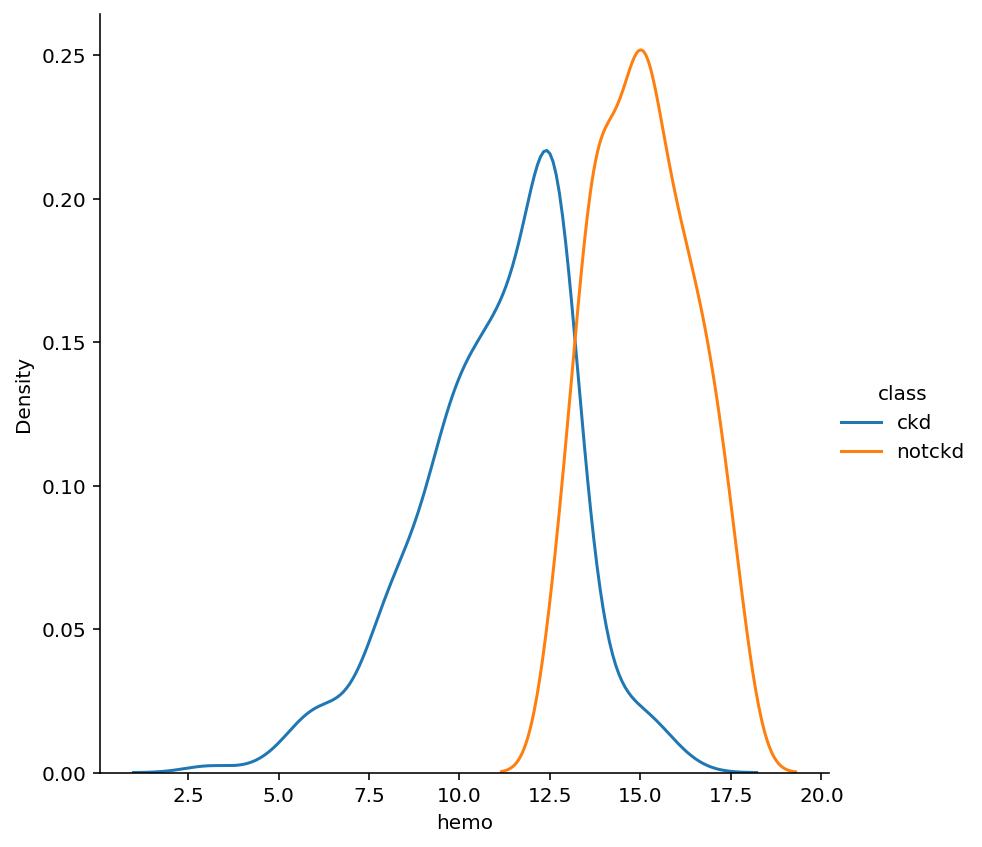

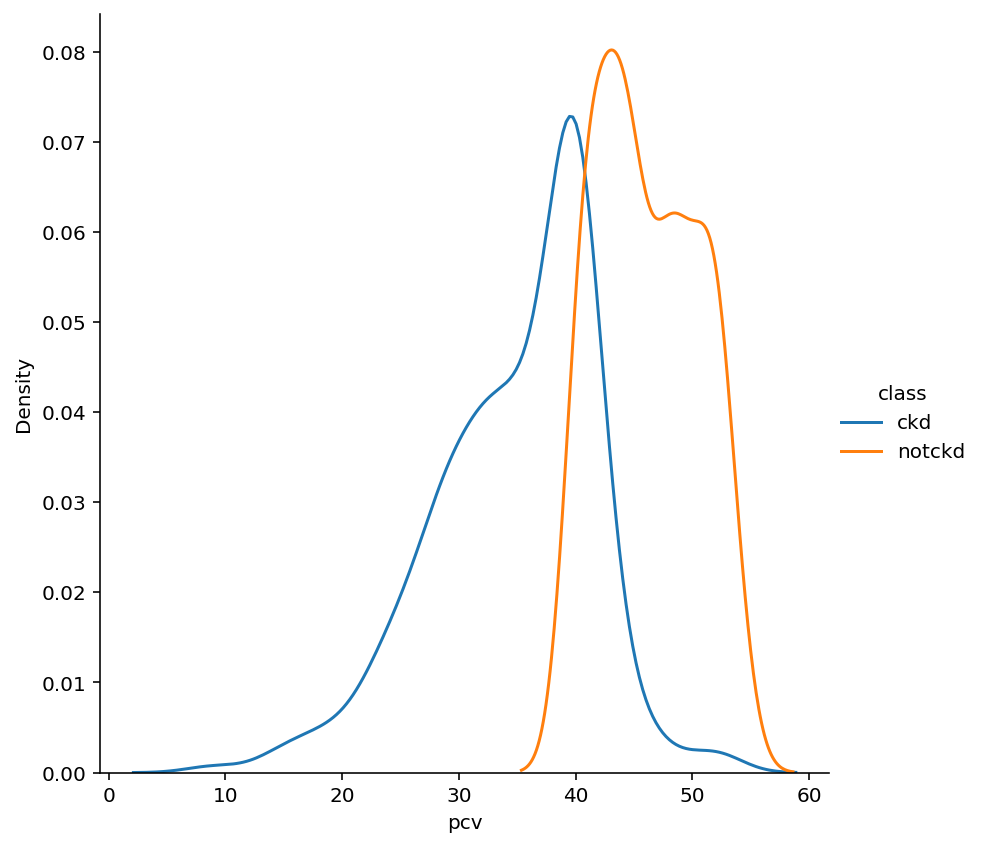

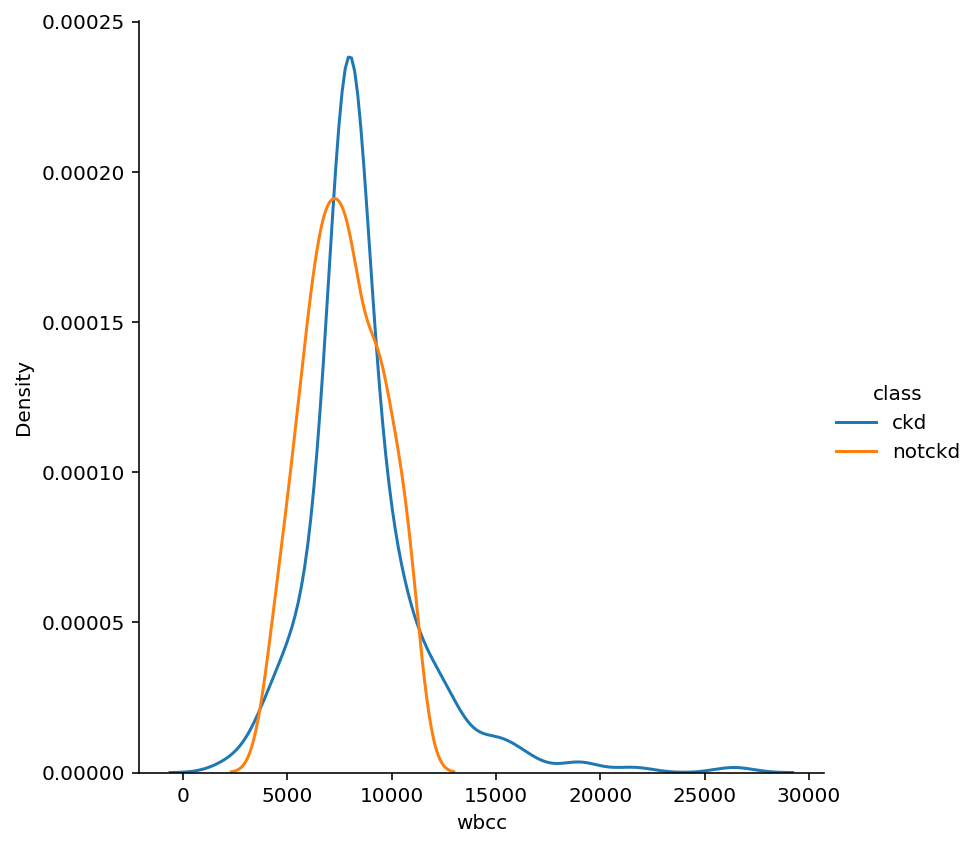

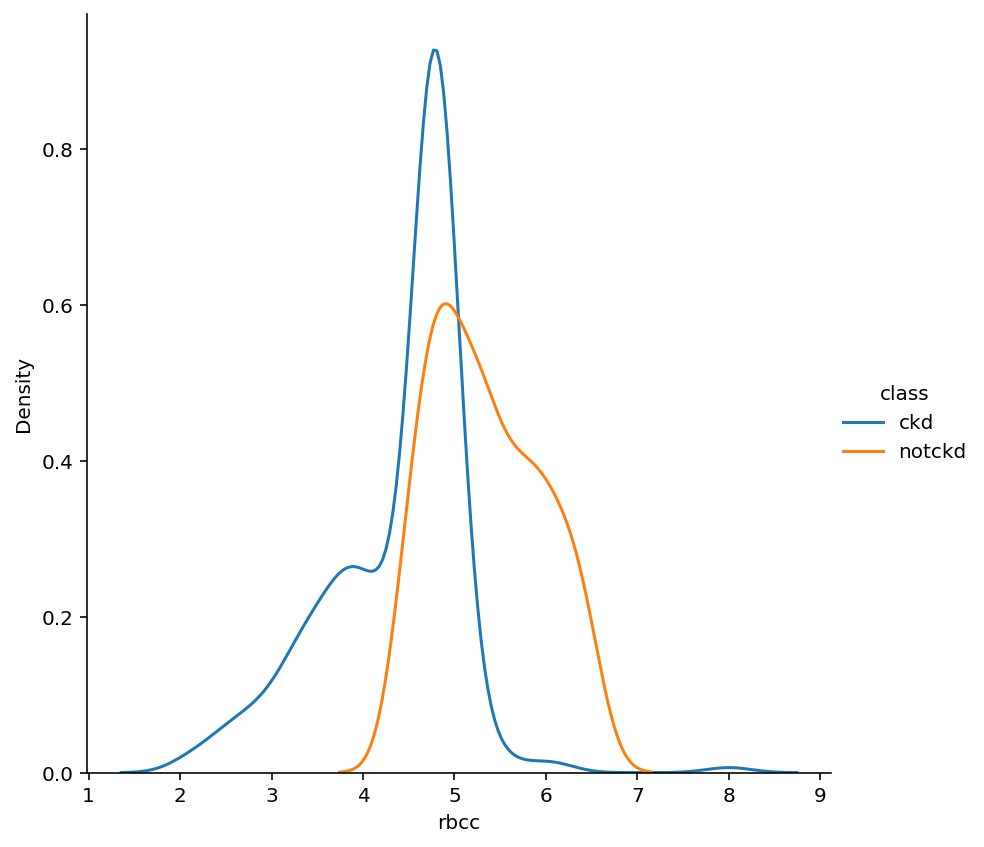

In [29]:
numerical_variables_with_class = numerical_variables.tolist()
numerical_variables_with_class.append('class')

plt.figure(figsize=(6,len(numerical_variables)*4))
for i,v in enumerate(numerical_variables):
    sns.FacetGrid(df_imputed[numerical_variables_with_class], hue="class", height=6) \
   .map(sns.kdeplot, v) \
   .add_legend()

In [30]:
sns.pairplot(df_imputed[numerical_variables_with_class], hue="class", height=2)

Output hidden; open in https://colab.research.google.com to view.

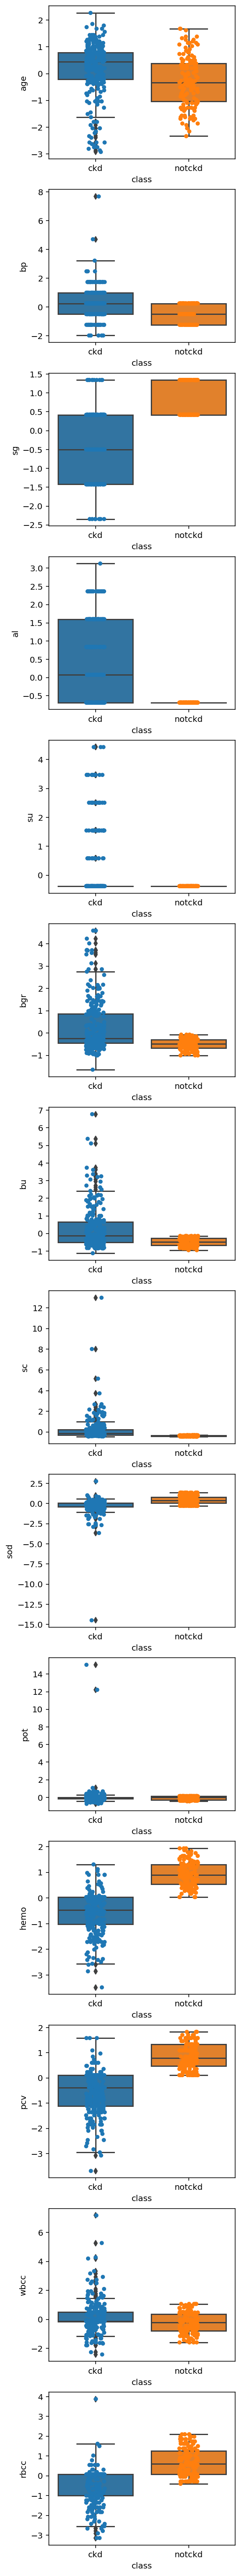

In [31]:
df_normalized['class'] = df_imputed['class']
plt.figure(figsize=(4,len(numerical_variables)*4))
for i,v in enumerate(numerical_variables):
    plt.subplot(len(numerical_variables), 1, i+1)
    sns.boxplot(data=df_normalized[numerical_variables_with_class], x='class', y = v)
    sns.stripplot(x="class", y = v, data=df_normalized[numerical_variables_with_class], jitter=True, edgecolor="gray")

### Principal Component Analysis

Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data.

The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors, where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors. Here, a best-fitting line is defined as one that minimizes the average squared perpendicular distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated.

Principal component analysis is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

<center>  <img src="https://drive.google.com/uc?export=view&id=1cU374zusZUUtedxk5mThWWmCxaFjfyio" width="550" height="320"> </center> 

To implement PCA we are going to use scikit-learn.


In [32]:
x = df_imputed.loc[:, numerical_variables].values
y = df_imputed.loc[:,['class']].values

Principal component analysis is affected by attribute scale so we normalize all the attributes by eliminating the mean and scaling to unit variance.

In [33]:
x = StandardScaler().fit_transform(x)

In [34]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(x)
pca_ckd = pd.DataFrame(data = new_data, 
                        columns = ['principal component 1', 'principal component 2'])

In [35]:
pca_ckd_complete = pca_ckd
pca_ckd_complete['class'] = df_imputed[['class']]

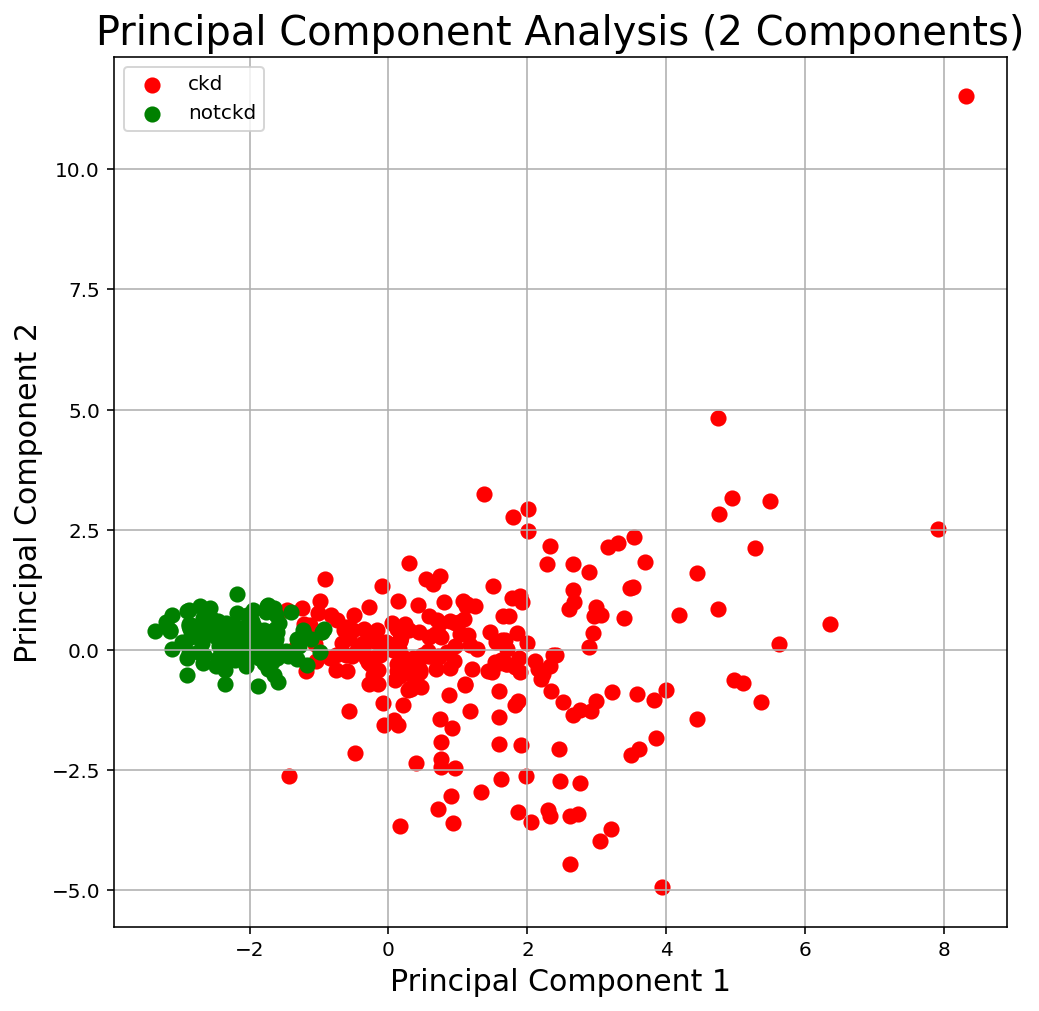

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component Analysis (2 Components)', fontsize = 20)
targets = ['ckd', 'notckd']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_ckd_complete['class'] == target
    ax.scatter(pca_ckd_complete.loc[indicesToKeep, 'principal component 1']
               , pca_ckd_complete.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [37]:
print("Explained Variance")
print("   Component 1 %3.2f"%(pca.explained_variance_ratio_[0]))
print("   Component 2 %3.2f"%(pca.explained_variance_ratio_[1]))
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))


Explained Variance
   Component 1 0.32
   Component 2 0.12
   Total Explained Variance 0.45


## Modeling with ScikitLearn

In order to train ML models in scikit-learn 
- import the model class
- read the dataset as pd.DataFrame
- eventually perform preprocessing and feature engineering
- use sklearn.model_selection.train_test_split to divide the dataset into train and test
- use sklearn.model_selection.cross_validate to select the best model by performing cross validation
- train the best model on the entire dataset with .fit and perform prediction with .predict

### Cross Validation

<center>  <img src="https://drive.google.com/uc?export=view&id=1m28T4KIU15CQvXo9HVIUyTkfpeq77DL1" width="550" height="320"> </center> 

In [38]:
# Firstly we encode the categorical variables
enc = OrdinalEncoder()
df_ = pd.DataFrame(enc.fit_transform(df_imputed), columns = df_imputed.columns)

In [39]:
df_.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,40.0,3.0,3.0,1.0,0.0,48.0,23.0,8.0,22.0,17.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,3.0,4.0,0.0,48.0,5.0,4.0,22.0,17.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.0,3.0,1.0,2.0,3.0,140.0,40.0,14.0,22.0,17.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,40.0,2.0,0.0,4.0,0.0,44.0,43.0,32.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,43.0,3.0,1.0,2.0,0.0,33.0,13.0,10.0,22.0,17.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X = df_.copy()
y = X['class']
X.drop(['class'], axis=1, inplace=True)

In [41]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.25, random_state=500)

In [42]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=25, max_features=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
   QuadraticDiscriminantAnalysis()
]

# iterate over classifiers

# preprocess dataset, split into training and test part
scoring = ['f1_macro', 'precision_macro', 'recall_macro']
for clf in classifiers:
    scores = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring)
    
    print('Model {}: F1={}; Precision={}; Recall={}\n'.format(clf, scores['test_f1_macro'].mean(), scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean()))



Model LogisticRegression(): F1=0.8952004947237147; Precision=0.8955330505407906; Recall=0.8992756512493354

Model KNeighborsClassifier(n_neighbors=3): F1=0.8887751713943665; Precision=0.891743128302726; Recall=0.8916600212652843

Model SVC(C=0.025, kernel='linear'): F1=0.8957596347175025; Precision=0.8951095382945228; Recall=0.9006645401382244

Model DecisionTreeClassifier(max_depth=5): F1=0.9064885893697981; Precision=0.9078787492177586; Recall=0.9158359914938862

Model RandomForestClassifier(max_depth=5, max_features=5, n_estimators=25): F1=0.9103056451663937; Precision=0.9105343523435628; Recall=0.9180887825624666

Model MLPClassifier(alpha=1, max_iter=1000): F1=0.9115718080795482; Precision=0.9112913731005836; Recall=0.9231592238171185

Model AdaBoostClassifier(): F1=0.8746738840794569; Precision=0.8793031763987645; Recall=0.8768208399787347

Model QuadraticDiscriminantAnalysis(): F1=0.9186277112709338; Precision=0.9184615384615386; Recall=0.9347953216374268



In [43]:
best_model = MLPClassifier()
best_model.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [44]:
score = best_model.score(X_test, y_test)
score

0.85

In [69]:
best_model.predict(X_test)

array([1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.])

[]

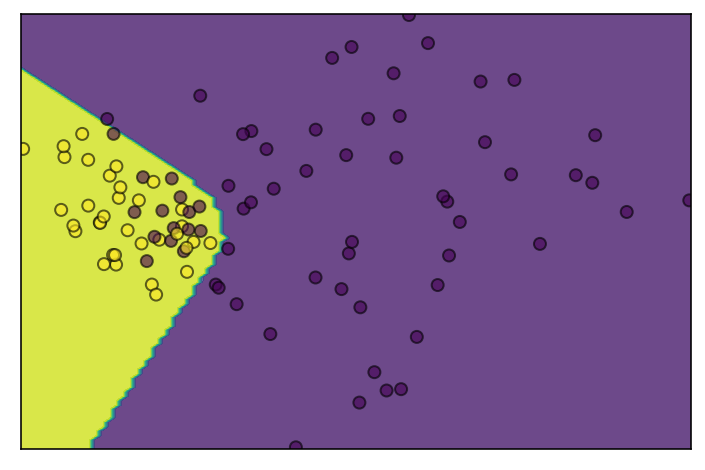

In [45]:
from sklearn.inspection import DecisionBoundaryDisplay

x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
ax = plt.subplot()

DecisionBoundaryDisplay.from_estimator(
            best_model, X_test,  alpha=0.8, ax=ax,  eps=0.5, response_method="predict"
        )

ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.6, edgecolors="k")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())

## Modeling with Pytorch

In [46]:
import random
from tqdm import tqdm

import torch
import torch.nn as nn
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset

device = torch.device('cpu')
# set the seed for reproducibility: built-in python, numpy, and pytorch
seed = 172
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [47]:
class UniversalApprox(nn.Module):
  def __init__(self, num_feature, num_units, dropout_rate):
    super().__init__()

    self.num_units = num_units
    self.num_feature = num_feature
    self.dropout_rate = dropout_rate

    # dropout is a function that takes as input activations from the previous layer and
    # sets some of them at zero, according to the dropout rate value.

    self.dense1 = nn.Linear(num_feature, self.num_units)
    self.dense2 = nn.Linear(self.num_units, int(self.num_units))
    self.dense3 = nn.Linear(int(self.num_units), int(self.num_units / 2))
    self.dense4 = nn.Linear(int(self.num_units/ 2), 1)
    self.dropout = nn.Dropout(p = self.dropout_rate)

    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    result = torch.tanh(self.dense1(x))
    result = self.dropout(result)
    result = torch.tanh(self.dense2(result))
    result = self.dropout(result)
    result = torch.tanh(self.dense3(result))
    result = self.dropout(result)
    result = torch.tanh(self.dense4(result))
    result = self.sigmoid(result)
    return result

In [48]:
train_data = torch.tensor(X_train).type(torch.FloatTensor)
train_label = torch.tensor(y_train.array).type(torch.FloatTensor)
test_data = torch.tensor(X_test).type(torch.FloatTensor)
test_label = torch.tensor(y_test.array).type(torch.FloatTensor)


train_dataloader = DataLoader(TensorDataset(train_data, train_label), batch_size= 32, shuffle=True)
valid_dataloader = DataLoader(TensorDataset(test_data, test_label), batch_size= 32, shuffle=True)

In [49]:
train_data.size()

torch.Size([300, 2])

In [62]:
model = UniversalApprox(num_units = 128, num_feature=train_data.size()[1],  dropout_rate = .2)
model.to(device)

UniversalApprox(
  (dense1): Linear(in_features=2, out_features=128, bias=True)
  (dense2): Linear(in_features=128, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=64, bias=True)
  (dense4): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (sigmoid): Sigmoid()
)

In [63]:
# Settings
num_epochs = 300 
learning_rate = 0.001 

In [64]:
def training_step(net, criterion, optimizer):
    # set the model to train mode
    running_loss=0
    net.train()
    for batch_idx, (x, y) in enumerate(train_dataloader): # avoid for loop when batch is equal to input data size
      # add one dimension
      #x = x.view(-1, 1) 
      y = y.view(-1, 1) 

      # transfer to device
      x, y = x.to(device), y.to(device)

      #forward pass 
      model_pred = net(x)

      #loss function evaluation
      loss = criterion(model_pred, y)

      #initialize optimizer
      optimizer.zero_grad()

      # Backward pass: compute gradient of the loss with respect to model
      # parameters
      loss.backward()

      # Calling the step function on an Optimizer makes an update to its
      # parameters
      optimizer.step()

      running_loss+=loss.item()

    return running_loss/(batch_idx+1)

In [65]:
def validation_step(net, criterion, optimizer):

    running_loss=0
    # set the model to train mode
    net.eval()
    for batch_idx, (x, y) in enumerate(valid_dataloader): # avoid for loop when batch is equal to input data size
      
      # add one dimension
      #x = x.view(-1, 1) 
      y = y.view(-1, 1) 

      # transfer to device
      x, y = x.to(device), y.to(device)

      # While, we are performing inference, we don't compute gradients, and thus, don't need to cache these values. 
      # Infact, no graph needs to be create during inference as it will lead to useless consumption of memory.

      with torch.no_grad():
        model_pred = net(x)

        loss = criterion(model_pred, y)

        running_loss+=loss.item()
    return running_loss/(batch_idx+1)


In [66]:
def plot_loss(training_loss, validation_loss):
  plt.plot(range(len(training_loss)), training_loss, c='b', label='Loss Training')
  plt.plot(range(len(validation_loss)), validation_loss, c='r', label='Loss Validation')
  #plt.ylim(0.4, 0.8)
  plt.show()


 epoch 0
-- train loss 0.544, validation loss 0.592

 epoch 5
-- train loss 0.487, validation loss 0.556

 epoch 10
-- train loss 0.463, validation loss 0.63

 epoch 15
-- train loss 0.43, validation loss 0.449

 epoch 20
-- train loss 0.42, validation loss 0.515

 epoch 25
-- train loss 0.413, validation loss 0.425

 epoch 30
-- train loss 0.404, validation loss 0.564

 epoch 35
-- train loss 0.403, validation loss 0.491

 epoch 40
-- train loss 0.402, validation loss 0.496

 epoch 45
-- train loss 0.383, validation loss 0.539

 epoch 50
-- train loss 0.384, validation loss 0.414

 epoch 55
-- train loss 0.38, validation loss 0.426

 epoch 60
-- train loss 0.402, validation loss 0.527

 epoch 65
-- train loss 0.384, validation loss 0.477

 epoch 70
-- train loss 0.389, validation loss 0.497

 epoch 75
-- train loss 0.393, validation loss 0.544

 epoch 80
-- train loss 0.383, validation loss 0.43

 epoch 85
-- train loss 0.378, validation loss 0.433

 epoch 90
-- train loss 0.381, val

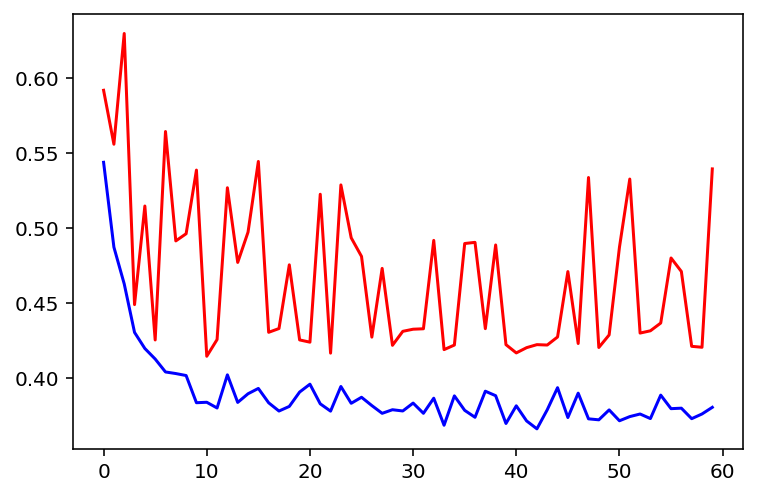

Loss Diff 0.08782403156161309


In [67]:

criterion = nn.BCELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

tr_loss, va_loss = [], []

for epoch in range(num_epochs):
  tr_loss_step = training_step(model, criterion = criterion, optimizer = optimizer)
  if epoch % 5 == 0:
    va_loss_step = validation_step(model, criterion = criterion, optimizer = optimizer)
    va_loss.append(va_loss_step)
    tr_loss.append(tr_loss_step)
    print(f'\n epoch {epoch}')
    print(f'-- train loss {tr_loss_step:.3}, validation loss {va_loss_step:.3}')


plot_loss(tr_loss, va_loss)
loss_diff = np.array(va_loss)- np.array(tr_loss)
print('Loss Diff', np.mean(loss_diff[-10:]))

In [76]:
threshold = torch.tensor([0.5])

results = (model(test_data[:10]).squeeze(-1)>threshold).float()*1

print(results, test_label[:10])

tensor([1., 1., 0., 0., 1., 1., 0., 0., 1., 0.]) tensor([1., 0., 0., 0., 1., 0., 0., 0., 1., 0.])
